In [1]:
from google.cloud import storage
import os

In [1]:
a='hello'

In [3]:
a[-3:]

'llo'

In [6]:
def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    #project1test-314909
    #bucket_name = "wagon-data-606-courtois"
    #wagon-data-606-courtois/data/IMG_8664.jpg
    #source_file_name = os.path.join('notebooks', 'IMG_8664.jpg')
    #data
    #destination_blob_name = 'IMG_8664.jpg'

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )

In [13]:
upload_blob("wagon-data-606-courtois", os.path.join('IMG_8664.jpg'), 'data/blob2')

File IMG_8664.jpg uploaded to data/blob2.


In [14]:
#square small: 

In [17]:
from PIL import Image

im = Image.open("squaresmall.jpg")

In [20]:
print(im.size)


(100, 100)


In [21]:
resized_image = im.resize((320,320))
print(resized_image.size)

(320, 320)


In [23]:
#square big:

In [26]:
im2 = Image.open("squarebig.png").resize((320,320))

print(im2.size)

(320, 320)


In [38]:
#rect big:

In [45]:
im3 = Image.open("rectbig.jpg").rotate(90, expand=True)

In [50]:
width = int(round(im3.size[0]*(320/im3.size[1])))

In [51]:
im3=im3.resize((width,320))

In [52]:
print(im3.size)

(640, 320)


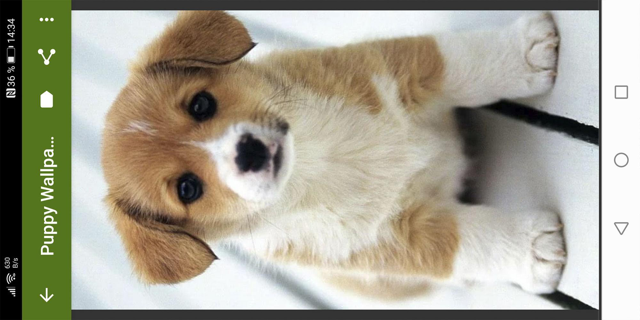

In [53]:
im3

In [62]:
left = (600-320)/2
top = 0
right = (600-320)/2 +320
bottom = 320

imcropped = im3.crop((left, top, right, bottom))

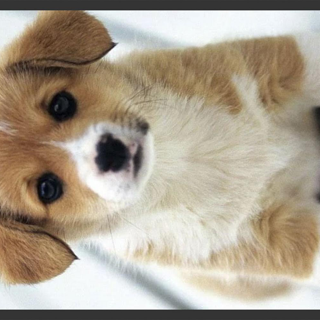

In [63]:
imcropped

In [77]:
def adjust_image(image):
    if image.size[0]==image.size[1]:
        if image.size[0]!=320:
            image=im.resize((320,320))
        else:
            image=image
    else:
        if image.size[0]>image.size[1]:        
            width = int(round(image.size[0]*(320/image.size[1])))
            image=image.resize((width,320))
            left = (image.size[0]-image.size[1])/2
            top = 0
            right = (image.size[0]-image.size[1])/2 +image.size[1]
            bottom = image.size[1]
            image = image.crop((left, top, right, bottom))
        
        else:
            image=image.rotate(90, expand=True)
            width = int(round(image.size[0]*(320/image.size[1])))
            image=image.resize((width,320))
            left = (image.size[0]-image.size[1])/2
            top = 0
            right = (image.size[0]-image.size[1])/2 +image.size[1]
            bottom = image.size[1]
            image = image.crop((left, top, right, bottom))
            image=image.rotate(270)
    
    return image 

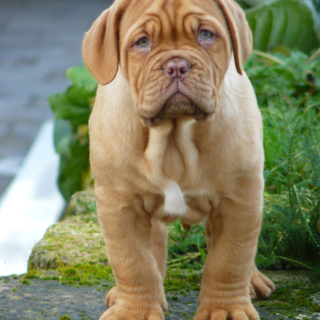

In [78]:
from PIL import Image
image = Image.open("rectsmall.jpg")
adjust_image(image)

In [95]:
import requests 

url = 'https://solarvision-10-iq5yzqlj2q-ew.a.run.app/predict' 

params={'upload':os.path.join('data/predict_image', 'screen.PNG')} 

In [96]:
print (os.path.join('data/predict_image', 'screen.PNG'))

data/predict_image/screen.PNG


In [97]:
response = requests.get(url, params).json()

#if response['test'] == 1:
#    print('This rooftop has a solar panel') 

#else:
#    print('This rooftop does not have a solar panel')

In [98]:
print(response)

{'test': 0}


In [100]:
import streamlit as st
import requests
import os
#import uuid
from google.cloud import storage
from PIL import Image
image = Image.open("rectsmall.jpg")
#st.image(uploaded_file, caption='Your image', use_column_width='auto')
#uploaded_file.name = str(uuid.uuid4())
uploaded_file_name = 'rectsmall.jpg' 
storage_client = storage.Client()
bucket = storage_client.bucket('solarvision-test')
blob = bucket.blob(os.path.join('data/predict_image', uploaded_file_name))
blob.upload_from_filename(os.path.join(uploaded_file_name)) 